In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_wine 

In [2]:
wine = load_wine()
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)
rfc.fit(X_train, y_train)

score_c = clf.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)

print('Single Tree: %.2f\nRandom Forests: %.2f' %(score_c, score_r))

Single Tree: 0.94
Random Forests: 0.98


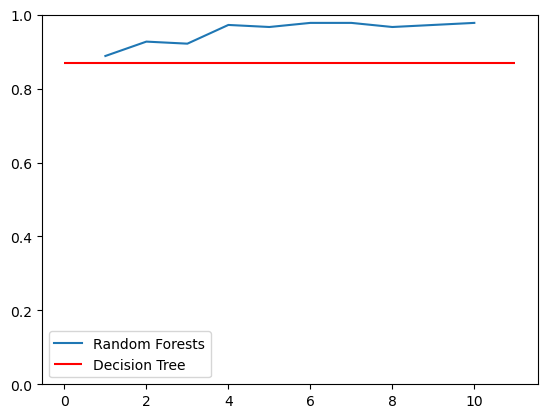

In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc_scores = []
for n in range(1,11):
    rfc = RandomForestClassifier(n_estimators=n+1, random_state=0)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_scores.append(rfc_s)

clf = DecisionTreeClassifier( random_state=0)
clf_score = cross_val_score(clf,wine.data,wine.target, cv=10).mean()

plt.plot(range(1,11), rfc_scores, label='Random Forests')
plt.hlines(clf_score,0,11, label='Decision Tree', colors='r')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [11]:
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)
rfc.oob_score_


0.9719101123595506

In [13]:
import numpy as np
rfc.feature_importances_
imp_lst = np.argsort(rfc.feature_importances_)[::-1]
imp_lst

array([ 6,  9, 12,  0, 10, 11,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

In [15]:
for i, imp_idx in enumerate(imp_lst):
    print(
        '%2d) %-*s %.3f' % (i+1, 30, wine.feature_names[imp_idx], rfc.feature_importances_[imp_idx])
    )


 1) flavanoids                     0.238
 2) color_intensity                0.177
 3) proline                        0.126
 4) alcohol                        0.108
 5) hue                            0.089
 6) od280/od315_of_diluted_wines   0.060
 7) total_phenols                  0.057
 8) magnesium                      0.042
 9) malic_acid                     0.027
10) proanthocyanins                0.024
11) alcalinity_of_ash              0.022
12) nonflavanoid_phenols           0.016
13) ash                            0.015


In [16]:
rfc.apply(X_test)

array([[24, 14, 14, ..., 22, 22, 21],
       [ 3,  5,  4, ..., 11, 10,  4],
       [ 6, 11,  8, ...,  2, 18, 19],
       ...,
       [ 7,  5,  8, ..., 11, 10,  8],
       [24, 14, 14, ..., 22, 22, 21],
       [ 3,  5,  4, ..., 11, 15,  4]], dtype=int64)

In [17]:
rfc.predict(X_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [18]:
rfc.predict_proba(X_test)

array([[1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.92, 0.04],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 0.12, 0.88],
 

In [26]:
import pandas as pd 
df = pd.DataFrame({'A':[1,2,3,4],
                   'B':[5,6,7,8]})
df1 = df.copy()
df1.iloc[2,1]=np.nan
df1

pd.concat([df.iloc[:,df.columns !='B'], df1], axis=1)

,A,A,B
0,1,1,5.0
1,2,2,6.0
2,3,3,NaN
3,4,4,8.0


In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [28]:
data = load_breast_cancer()
data.feature_names 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
data.data.shape

(569, 30)

In [33]:
data.target.shape


(569,)

In [34]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
X, y = data.data, data.target
clf = RandomForestClassifier(n_estimators =100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [41]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9590643274853801

In [42]:
cross_val_score(clf, X, y, cv=10).mean()

0.9649122807017545

In [45]:
param = {
    'max_depth':[*range(10)],
    'criterion':['gini', 'entropy'],
    'min_samples_split':[*range(2,10)],
}
gs = GridSearchCV(clf, param_grid=param, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_


c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\su_yu\anaconda3\Lib\site-pac

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5}

In [46]:
gs.best_score_

0.9649358974358975

In [49]:
gs.best_estimator_.score(X_test, y_test)

0.9707602339181286

ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

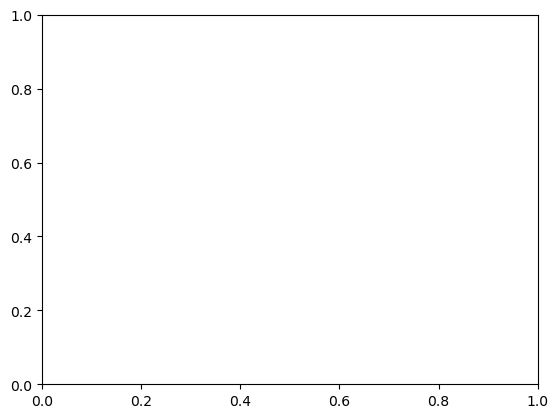

In [51]:
scores = []
for n in range(1, 100):
    rfc2 = RandomForestClassifier(n_estimators=n
                                ,random_state=1
                            ,criterion="entropy"
                            ,min_samples_split=5
                            ,min_samples_leaf=1
                            ,max_depth=6
                            # ,max_features=2
                            # ,max_leaf_nodes=36
                            )
    score2 = cross_val_score(rfc2,data.data,data.target,cv=10).mean()
    scores.append(score2)


In [60]:
print(max(scores), scores.index(max(scores)))

0.968421052631579 6


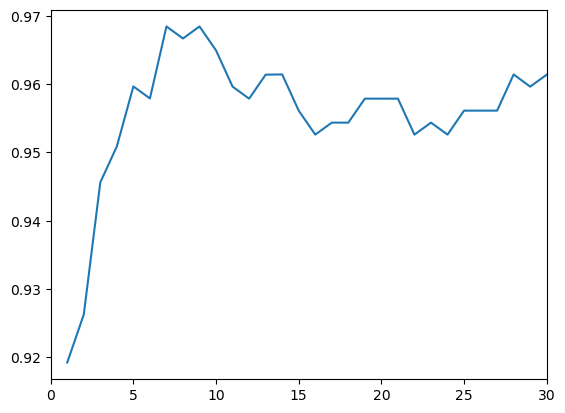

In [59]:

plt.plot(range(1,100), scores)
plt.xlim(0,30)
plt.show()

In [58]:
rfc3 = RandomForestClassifier(n_estimators=7
                            ,random_state=1
                        ,criterion="entropy"
                        ,min_samples_split=5
                        ,min_samples_leaf=1
                        ,max_depth=6
                        # ,max_features=2
                        # ,max_leaf_nodes=36
                        )
score3 = cross_val_score(rfc3,data.data,data.target,cv=10).mean()
score3

0.968421052631579